## Customer Churn Prediction

This notebook explores customer usage patterns and builds a churn prediction model.
The goal is to understand key drivers of churn and evaluate model performance.

In [1]:
import pandas as pd

In [2]:
data_path = "../data/telecom_churn_raw.csv"
df = pd.read_csv(data_path)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [3]:
df.shape
df.info()
df["Churn"].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

Churn
False    0.857571
True     0.142429
Name: proportion, dtype: float64

## Key observations

- The dataset contains 667 customers with no missing values
- Churn is relatively rare at about 14 percent of customers
- This class imbalance will influence model choice and evaluation metrics

In [4]:
df.groupby("Churn")["Customer service calls"].mean()


Churn
False    1.437063
True     2.326316
Name: Customer service calls, dtype: float64

In [5]:
df.groupby("Churn")["Total day minutes"].mean()

Churn
False    175.460140
True     213.991579
Name: Total day minutes, dtype: float64

## Early feature signals

Customers who churn tend to:
- Contact customer service more frequently
- Have higher daytime usage on average

These patterns suggest churn may be driven by service friction
and perceived cost relative to usage.


In [6]:
numeric_cols = [
    "Total eve minutes",
    "Total night minutes",
    "Total intl minutes",
    "Total intl calls"
]

df.groupby("Churn")[numeric_cols].mean()


,Total eve minutes,Total night minutes,Total intl minutes,Total intl calls
Churn,,,,
False,199.799650,198.815385,10.242657,4.512238
True,224.764211,204.923158,10.212632,4.621053


## Feature relevance check

- Daytime and evening usage show clear differences between churned and retained customers
- Night time and international usage show minimal separation
- Not all usage features contribute equally to churn risk


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

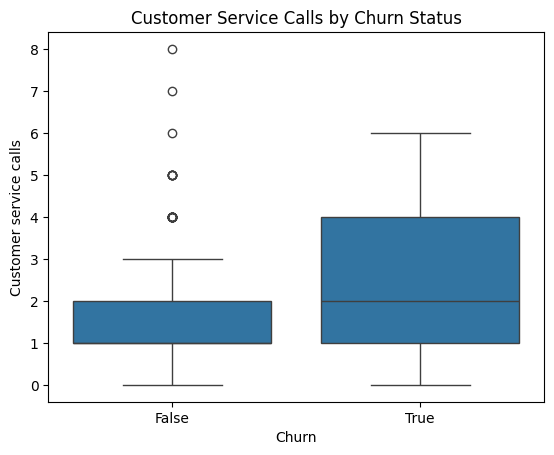

In [8]:
sns.boxplot(x="Churn", y="Customer service calls", data=df)
plt.title("Customer Service Calls by Churn Status")
plt.show()

The distribution shows that churned customers contact customer service
more frequently and with greater variability.

This suggests repeated service friction is a strong indicator of churn risk.

In [9]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

Note: Call charges are linear transformations of call minutes.
Both are retained initially, but feature redundancy will be
evaluated during modeling.


## Feature Categorization
Categorical features:
- State
- International plan
- Voice mail plan

Numeric features:
- Account length
- Area code
- Number vmail messages
- Call minutes, calls, and charges
- Customer service calls

Target:
- Churn

In [10]:
X = df.drop(columns="Churn")
y = df["Churn"]

X.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1


In [11]:
categorical_cols = [
    "State",
    "International plan",
    "Voice mail plan"
]

numeric_cols = [
    col for col in X.columns if col not in categorical_cols
]

categorical_cols, numeric_cols

(['State', 'International plan', 'Voice mail plan'],
 ['Account length',
  'Area code',
  'Number vmail messages',
  'Total day minutes',
  'Total day calls',
  'Total day charge',
  'Total eve minutes',
  'Total eve calls',
  'Total eve charge',
  'Total night minutes',
  'Total night calls',
  'Total night charge',
  'Total intl minutes',
  'Total intl calls',
  'Total intl charge',
  'Customer service calls'])

In [12]:
df.groupby("Churn")[numeric_cols].mean().T.sort_values(by=True, ascending=False).head(10)

Churn,False,True
Area code,435.695804,438.936842
Total eve minutes,199.799650,224.764211
Total day minutes,175.460140,213.991579
Total night minutes,198.815385,204.923158
Account length,102.636364,104.073684
Total eve calls,100.047203,103.063158
Total day calls,100.776224,101.905263
Total night calls,100.258741,99.242105
Total day charge,29.828829,36.379053
Total eve charge,16.983024,19.105053


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [17]:
log_reg = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(max_iter=1000))
    ]
)

In [18]:
log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Account length',
                                                   'Area code',
                                                   'Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['State',
                                                   'International plan',
                                                   'Voice mail plan'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [19]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

       False       0.88      0.97      0.92       115
        True       0.50      0.16      0.24        19

    accuracy                           0.86       134
   macro avg       0.69      0.57      0.58       134
weighted avg       0.82      0.86      0.83       134

ROC AUC: 0.7839816933638444


## Fix class imbalance properly

In [20]:
# Rebuild model with class weighting

log_reg_balanced = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
    ]
)

In [21]:
# Train
log_reg_balanced.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Account length',
                                                   'Area code',
                                                   'Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['State',
                                                   'International plan',
                                                   'Voice mail plan'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [22]:
# Evaluate
y_pred_bal = log_reg_balanced.predict(X_test)
y_proba_bal = log_reg_balanced.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_bal))
print("ROC AUC:", roc_auc_score(y_test, y_proba_bal))

              precision    recall  f1-score   support

       False       0.91      0.80      0.85       115
        True       0.30      0.53      0.38        19

    accuracy                           0.76       134
   macro avg       0.61      0.66      0.62       134
weighted avg       0.82      0.76      0.79       134

ROC AUC: 0.774370709382151


## Interpret the model


In [23]:
# Extract feature importance

feature_names = (
    log_reg_balanced.named_steps["preprocessor"]
    .get_feature_names_out()
)

coefficients = (
    log_reg_balanced.named_steps["model"]
    .coef_[0]
)

coef_df = (
    pd.DataFrame({
        "feature": feature_names,
        "coefficient": coefficients
    })
    .sort_values(by="coefficient", ascending=False)
)

coef_df.head(10), coef_df.tail(10)

(                        feature  coefficient
 57                cat__State_SD     1.212478
 20                cat__State_CA     1.127426
 47                cat__State_NJ     1.122221
 68  cat__International plan_Yes     1.094987
 15  num__Customer service calls     1.038922
 42                cat__State_MT     1.023681
 55                cat__State_RI     0.979169
 29                cat__State_ID     0.797763
 21                cat__State_CO     0.700882
 36                cat__State_MD     0.644782,
                        feature  coefficient
 48               cat__State_NM    -0.590491
 23               cat__State_DC    -0.672301
 43               cat__State_NC    -0.677268
 16               cat__State_AK    -0.711809
 44               cat__State_ND    -0.725761
 26               cat__State_GA    -0.760653
 51               cat__State_OH    -0.805916
 25               cat__State_FL    -0.814781
 58               cat__State_TN    -1.062035
 67  cat__International plan_No    -1.15780

### Model Interpretation

Customer service calls and international plan status are the strongest positive predictors of churn, aligning with earlier exploratory analysis. High usage features also contribute positively. State level coefficients show variability but are treated as secondary signals rather than primary drivers.

In [24]:
# Precision recall curve and threshold discussion

from sklearn.metrics import precision_recall_curve

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_bal)

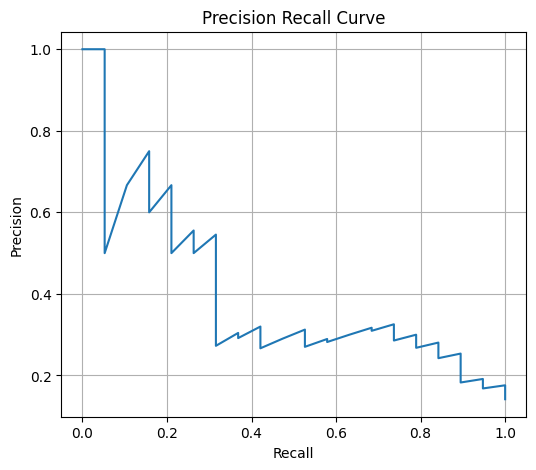

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")
plt.grid(True)
plt.show()

In [27]:
list(zip(thresholds[:5], precision[:5], recall[:5]))

[(np.float64(0.001375571211912141),
  np.float64(0.1417910447761194),
  np.float64(1.0)),
 (np.float64(0.005227446042466606),
  np.float64(0.14285714285714285),
  np.float64(1.0)),
 (np.float64(0.00788033860764755),
  np.float64(0.14393939393939395),
  np.float64(1.0)),
 (np.float64(0.010375132028471713),
  np.float64(0.1450381679389313),
  np.float64(1.0)),
 (np.float64(0.010817651702884186),
  np.float64(0.14615384615384616),
  np.float64(1.0))]

In [28]:
import numpy as np

target_recall = 0.6
idx = np.argmin(np.abs(recall - target_recall))

thresholds[idx], precision[idx], recall[idx]

(np.float64(0.3827437656241176),
 np.float64(0.28205128205128205),
 np.float64(0.5789473684210527))

If the company flags customers whose churn probability is ≥ 0.38:

- You catch ~58 percent of all churners

- About 1 in 3 flagged customers actually churn

- You do not waste effort on everyone

Applying class weighted logistic regression significantly improved churn recall, increasing detection of at risk customers at the cost of overall accuracy. This tradeoff is appropriate for churn mitigation use cases where false negatives are more costly than false positives.

Instead of using the default 0.5 decision threshold, I selected a threshold based on the precision recall tradeoff.

At a threshold of 0.38, the model achieves ~58 percent recall with ~28 percent precision.

This operating point prioritizes identifying a majority of churn risk customers while keeping outreach effort manageable.

Such a threshold is more appropriate for real world churn intervention where missing churners is costlier than contacting some non churners.

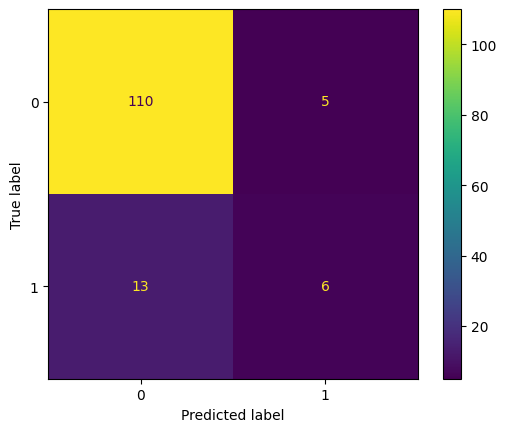

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_thresh = (y_proba >= 0.3827).astype(int)

cm = confusion_matrix(y_test, y_pred_thresh)
ConfusionMatrixDisplay(cm).plot()

- Out of 19 actual churners, you correctly catch 6

- You miss 13 churners

- You only bother 5 non churners unnecessarily

At the selected threshold of 0.38, the model prioritizes reducing false negatives while keeping false positives low.

In this setting, the model correctly identifies 6 out of 19 churners while only flagging 5 non churners incorrectly.

This reflects a realistic churn intervention scenario where outreach cost is low relative to churn loss.